# Analysis of some genes

We selected 15 example genes based on previous analysis

- [Analysis gene parameters](#Analysis-gene-parameters)
- [Splitting the data set based on expression level](#Splitting-the-data-set-based-on-expression-level)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

In [2]:
transcipts_data = pd.read_csv('../data/example_genes_transcripts.tsv', 
                         sep='\t')

In [3]:
transcipts_data

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,Max_AC_in_transcript,Consequence_of_max_AC,AC/Variant,LOEUF_transcript,Exon_number,Max_median_expression
0,ENST00000222305,49,1,0,34,1,2,2,0,7,USF2,ENSG00000105698,36,12,frameshift_variant,1.361111,0.710,10.0,106.75
1,ENST00000227163,12,0,0,7,0,2,0,0,2,SPI1,ENSG00000066336,11,3,frameshift_variant,1.090909,0.349,5.0,91.50
2,ENST00000255641,125,3,2,109,1,2,4,0,2,CSNK1G2,ENSG00000133275,57,93,stop_gained,2.192982,0.477,11.0,105.10
3,ENST00000264546,69,3,3,50,1,3,0,0,5,FRMD4A,ENSG00000151474,124,7,stop_gained,0.556452,0.689,17.0,0.70
4,ENST00000266589,35,2,0,25,1,3,0,0,0,SCAF11,ENSG00000139218,30,8,splice_donor_variant,1.166667,1.445,5.0,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,ENST00000649423,3,0,0,2,0,0,0,0,0,FRMD4A,ENSG00000151474,1,3,stop_gained,3.000000,NaN,NaN,NaN
110,ENST00000649947,3,0,0,2,0,0,0,0,0,FRMD4A,ENSG00000151474,1,3,stop_gained,3.000000,NaN,NaN,NaN
111,ENST00000650137,4,0,0,3,0,0,0,0,1,FRMD4A,ENSG00000151474,3,2,frameshift_variant,1.333333,NaN,NaN,NaN
112,ENST00000675173,18,1,1,9,2,2,0,0,0,CDH2,ENSG00000170558,24,2,stop_gained,0.750000,0.527,7.0,NaN


## Analysis gene parameters

### Analysis of Expression per transcript versus AC/Variant

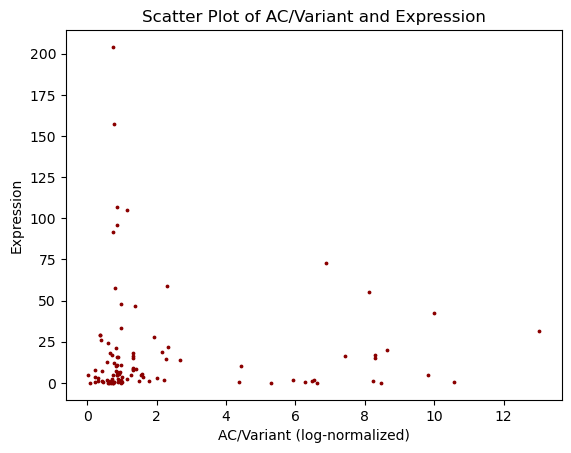

In [35]:
plt.scatter(np.log1p(transcipts_data['AC/Variant']), transcipts_data['Max_median_expression'], s=3, color = 'darkred')
plt.xlabel('AC/Variant (log-normalized)')
plt.ylabel('Expression')
plt.title('Scatter Plot of AC/Variant and Expression')
plt.show()

### Analysis of LOEUF per transcript versus AC/Variant

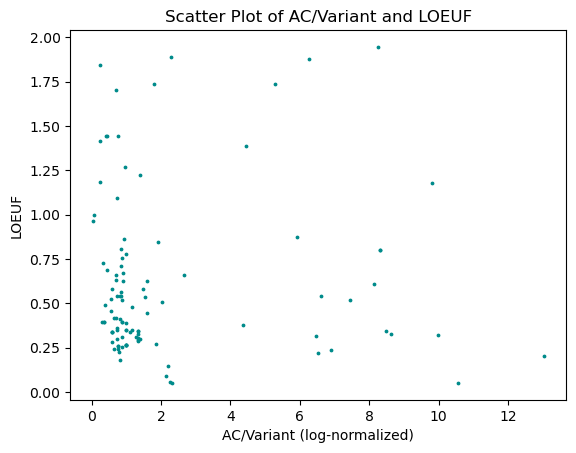

In [36]:
plt.scatter(np.log1p(transcipts_data['AC/Variant']), transcipts_data['LOEUF_transcript'], s=3, color = 'darkcyan')
plt.xlabel('AC/Variant (log-normalized)')
plt.ylabel('LOEUF')
plt.title('Scatter Plot of AC/Variant and LOEUF')
plt.show()

### Analysis of Exon number per transcript versus AC/Variant

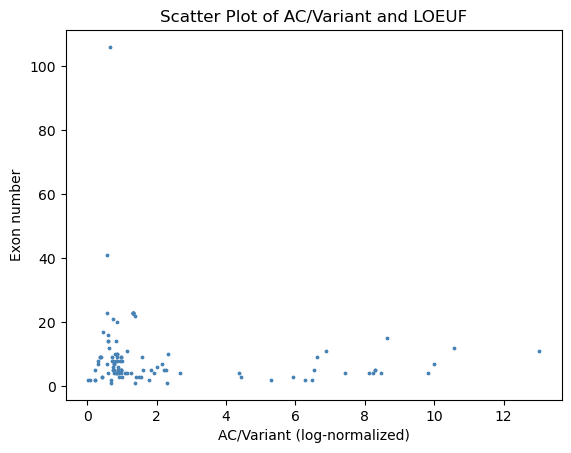

In [37]:
plt.scatter(np.log1p(transcipts_data['AC/Variant']), transcipts_data['Exon_number'], s=3, color = 'steelblue')
plt.xlabel('AC/Variant (log-normalized)')
plt.ylabel('Exon number')
plt.title('Scatter Plot of AC/Variant and LOEUF')
plt.show()

### Analysis of frequency of different pLoF-variants in gene transcripts

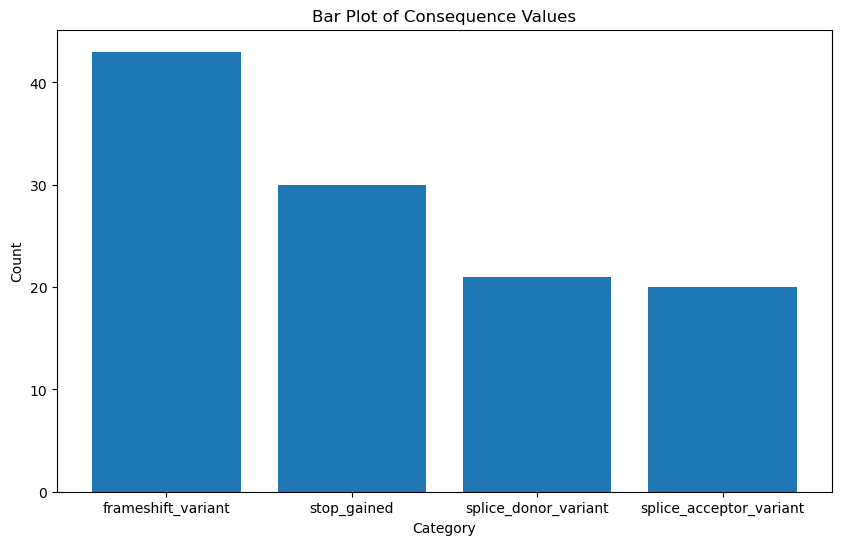

The most frequent category is: frameshift_variant
The count of the most frequent category is: 43


In [7]:
value_counts = transcipts_data['Consequence_of_max_AC'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values)
plt.title('Bar Plot of Consequence Values')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

most_frequent_category = value_counts.idxmax()
count_most_frequent = value_counts.max()

print(f"The most frequent category is: {most_frequent_category}")
print(f"The count of the most frequent category is: {count_most_frequent}")

In [8]:
max_ac_indices = transcipts_data.groupby('Gene_name')['Max_AC_in_transcript'].idxmax()

transcripts_with_max_AC = transcipts_data.loc[max_ac_indices, ['Transcript_ID', 'Gene_name',
                                                               'Max_AC_in_transcript','Consequence_of_max_AC',
                                                               'Max_median_expression',
                                                               'LOEUF_transcript']]

transcripts_with_max_AC.reset_index(drop=True)

,Transcript_ID,Gene_name,Max_AC_in_transcript,Consequence_of_max_AC,Max_median_expression,LOEUF_transcript
0,ENST00000566946,ATXN2L,548627,splice_acceptor_variant,42.230,0.321
1,ENST00000399380,CDH2,260344,stop_gained,20.205,0.327
2,ENST00000341222,CFLAR,275573,splice_acceptor_variant,15.000,0.803
3,ENST00000585957,CSNK1G2,3717,frameshift_variant,1.670,0.872
4,ENST00000475141,FRMD4A,827,frameshift_variant,0.000,1.736
5,ENST00000379383,MEMO1,14903,splice_donor_variant,0.000,0.540
6,ENST00000437806,NCDN,2604,splice_donor_variant,1.370,0.313
7,ENST00000457811,RAD23B,133858,frameshift_variant,0.000,0.346
8,ENST00000344700,RPS10,3426,splice_acceptor_variant,1.680,0.221
9,ENST00000551391,SCAF11,12436,frameshift_variant,0.395,1.878


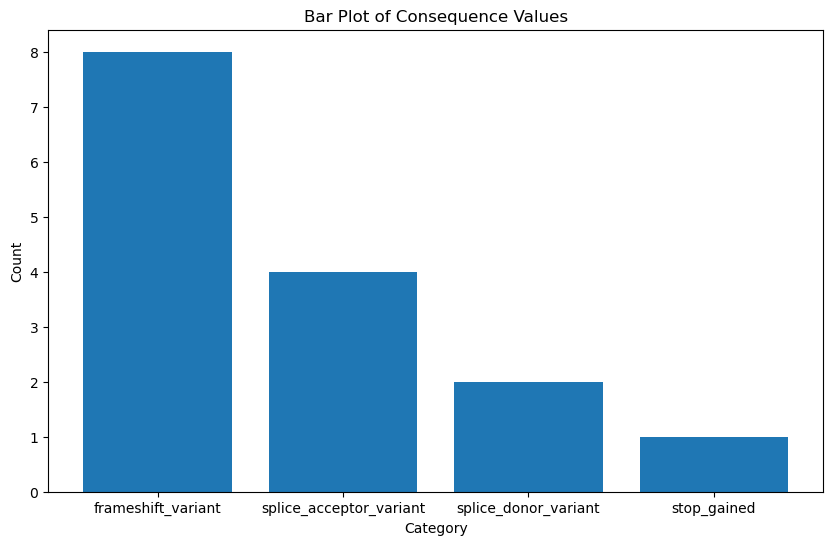

The most frequent category is: frameshift_variant
The count of the most frequent category is: 8


In [9]:
value_counts = transcripts_with_max_AC['Consequence_of_max_AC'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values)
plt.title('Bar Plot of Consequence Values')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

most_frequent_category = value_counts.idxmax()
count_most_frequent = value_counts.max()

print(f"The most frequent category is: {most_frequent_category}")
print(f"The count of the most frequent category is: {count_most_frequent}")

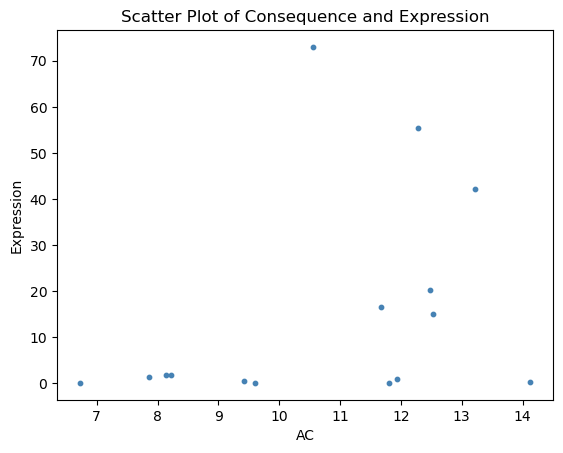

In [13]:
plt.scatter(np.log1p(transcripts_with_max_AC['Max_AC_in_transcript']), transcripts_with_max_AC['Max_median_expression'], s=10, color = 'steelblue')
plt.xlabel('AC')
plt.ylabel('Expression')
plt.title('Scatter Plot of Consequence and Expression')
plt.show()

### Splitting the data set based on expression level

In [19]:
hiqh_expression_genes = transcripts_with_max_AC[transcripts_with_max_AC['Max_median_expression'] > 10]
low_expression_genes = transcripts_with_max_AC[transcripts_with_max_AC['Max_median_expression'] < 10]

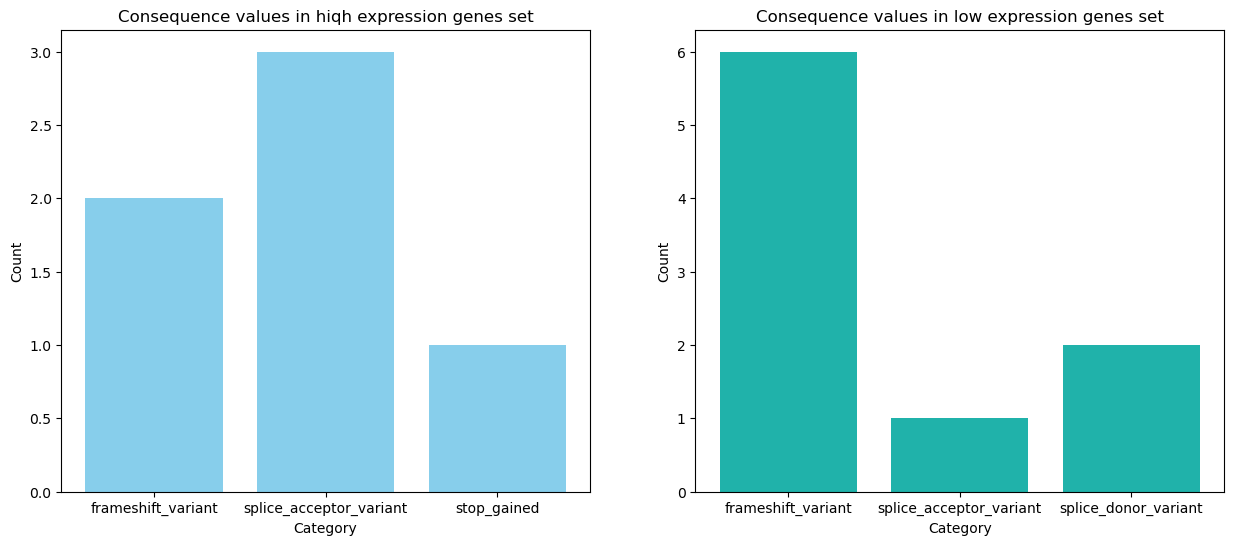

In [40]:
value_counts_1 = hiqh_expression_genes['Consequence_of_max_AC'].value_counts().sort_index()
value_counts_2 = low_expression_genes['Consequence_of_max_AC'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.bar(value_counts_1.index, value_counts_1.values, color='skyblue')
ax1.set_title('Consequence values in hiqh expression genes set')
ax1.set_xlabel('Category')
ax1.set_ylabel('Count')

ax2.bar(value_counts_2.index, value_counts_2.values, color='lightseagreen')
ax2.set_title('Consequence values in low expression genes set')
ax2.set_xlabel('Category')
ax2.set_ylabel('Count')
plt.savefig('../data/plots/consequence_example_genes.png', bbox_inches='tight')
plt.show()